In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import plot_importance
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [3]:
data = pd.read_csv('/Users/haixiangliu/Documents/水质数据及代码模型/water_clean_data.csv')

In [4]:
data.columns=['datetime','water_level','do','miss','input_wind_throughput','input_wind_openness','ts','input_water_cod','output_water_cod','input_water_ammonia','output_water_ammonia','input_water_ph','output_water_phosphorus','input_water_ss','output_water_ss']

In [5]:
index_array=[]
for d in data['output_water_cod']:
    if d>=50:
        index_array.append(1)  
    else:
        index_array.append(0)
data['label']=pd.DataFrame(index_array)

In [6]:
datetime_array=[]
for value in data['datetime']:
    datetime_array.append(value)
data[data<0]=np.nan
data['datetime']=pd.DataFrame(datetime_array)
data = data.fillna(0.0)

In [7]:
#抽样
data_0=data[data['label']==0]
data_1=data[data['label']==1]
data0 = data_0.sample(frac=0.02)
sampled_data = data_1.append(data0)

In [8]:
Y = sampled_data['label']
X= sampled_data.drop(['datetime','label','output_water_cod'],axis=1)

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.4,random_state = 0)

In [10]:
dtrain = xgb.DMatrix(X_train,label=y_train)
dtest= xgb.DMatrix(X_test,label = y_test)

### 用XGBoost进行分类预测

In [11]:
param={'max_depth':3,'eta':0.3,'silent':1,'objective':'multi:softprob','num_class':2}

In [12]:
num_round = 10
bst = xgb.train(param,dtrain,num_round)

In [13]:
preds= bst.predict(dtest)

In [14]:
#属于某类的可能性，选取概率大的作为分类
preds

array([[0.96866906, 0.03133094],
       [0.9526782 , 0.0473218 ],
       [0.96866906, 0.03133094],
       [0.9712524 , 0.0287476 ],
       [0.93038005, 0.06961997],
       [0.92873555, 0.07126447],
       [0.96265686, 0.0373432 ],
       [0.43829256, 0.5617074 ],
       [0.59612244, 0.4038775 ],
       [0.89541286, 0.10458712],
       [0.65833277, 0.3416672 ],
       [0.9712524 , 0.0287476 ],
       [0.95291847, 0.04708153],
       [0.16700728, 0.8329927 ],
       [0.96701217, 0.03298785],
       [0.9712524 , 0.0287476 ],
       [0.8335504 , 0.16644955],
       [0.9354212 , 0.06457871],
       [0.86417687, 0.13582315],
       [0.95291847, 0.04708153],
       [0.96866906, 0.03133094],
       [0.9712524 , 0.0287476 ],
       [0.96701217, 0.03298785],
       [0.83103603, 0.16896403],
       [0.9712524 , 0.0287476 ],
       [0.96701217, 0.03298785],
       [0.96265686, 0.0373432 ],
       [0.9583605 , 0.04163952],
       [0.9533402 , 0.04665982],
       [0.9526782 , 0.0473218 ],
       [0.

In [15]:
best_preds = np.asarray([np.argmax(line) for line in preds])

In [16]:
#预测精度
from sklearn.metrics import precision_score
p_score = precision_score(y_test,best_preds)
print('Precision_Score ：'+str(p_score))

Precision_Score ：0.7272727272727273


In [17]:
#模型评估
accuracy = accuracy_score(y_test,best_preds)
print('Accuracy: %.2f%%' %(accuracy*100.0))

Accuracy: 90.13%


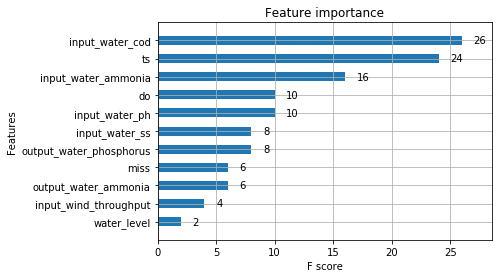

In [18]:
#feature的重要性
plot_importance(bst,height = 0.5)

Text(91.68,0.5,'predicted lable')

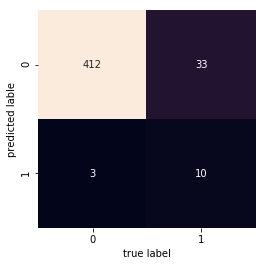

In [19]:
mat = confusion_matrix(y_test,best_preds)
sns.heatmap(mat.T,square = True,annot=True,fmt='o',cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted lable')

### 用XGBClassifier对数据进行预测

In [20]:
model = XGBClassifier(n_estimators=100,max_depth=3,objective='multi:softmax',num_class=2,subsample=0.8,colasmple_btree=0.8)

In [21]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colasmple_btree=0.8,
       colsample_bylevel=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, num_class=2,
       objective='multi:softmax', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.8)

In [22]:
eval_set = [(X_test,y_test)]
model.fit(X_train,y_train,eval_set=eval_set,eval_metric='mlogloss',early_stopping_rounds=10,verbose=True)

[0]	validation_0-mlogloss:0.62702
Will train until validation_0-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:0.573417
[2]	validation_0-mlogloss:0.528626
[3]	validation_0-mlogloss:0.490821
[4]	validation_0-mlogloss:0.457466
[5]	validation_0-mlogloss:0.430709
[6]	validation_0-mlogloss:0.407466
[7]	validation_0-mlogloss:0.387825
[8]	validation_0-mlogloss:0.370781
[9]	validation_0-mlogloss:0.355285
[10]	validation_0-mlogloss:0.342378
[11]	validation_0-mlogloss:0.331013
[12]	validation_0-mlogloss:0.321669
[13]	validation_0-mlogloss:0.3133
[14]	validation_0-mlogloss:0.306332
[15]	validation_0-mlogloss:0.300601
[16]	validation_0-mlogloss:0.294983
[17]	validation_0-mlogloss:0.289855
[18]	validation_0-mlogloss:0.286229
[19]	validation_0-mlogloss:0.283081
[20]	validation_0-mlogloss:0.280209
[21]	validation_0-mlogloss:0.276863
[22]	validation_0-mlogloss:0.274086
[23]	validation_0-mlogloss:0.271462
[24]	validation_0-mlogloss:0.269986
[25]	validation_0-mlogloss:0.268848
[26]	val

XGBClassifier(base_score=0.5, booster='gbtree', colasmple_btree=0.8,
       colsample_bylevel=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, num_class=2,
       objective='multi:softmax', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.8)

In [23]:
preds = model.predict(X_test)

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Text(91.68,0.5,'predicted lable')

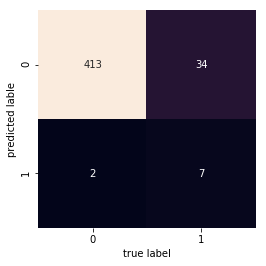

In [24]:
mat = confusion_matrix(y_test,preds)
sns.heatmap(mat.T,square = True,annot=True,fmt='o',cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted lable')

In [25]:
p_score = precision_score(y_test,preds)
print('Precision:'+str(p_score))

Precision:0.7777777777777778


In [26]:
acc_score=accuracy_score(y_test,preds)
print('Accuracy: %.2f%%' %(acc_score*100.0))

Accuracy: 90.13%


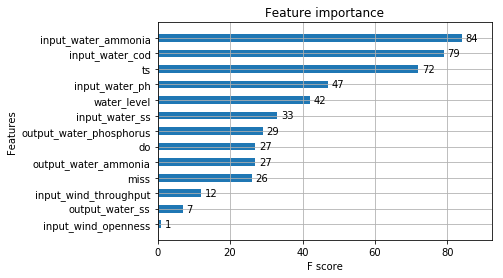

In [27]:
plot_importance(model,height=0.5)

### 用XGBClassifier模型对窗口处理后的数据进行分类预测

In [28]:
rolling_features_input_cols = ['do', 'miss', 'input_wind_throughput', 'input_wind_openness',
                    'input_water_cod', 'output_water_cod', 'input_water_ammonia', 
                    'output_water_ammonia', 'input_water_ph', 'output_water_phosphorus', 
                    'input_water_ss', 'output_water_ss']
lags=[3,7]

In [29]:
data1=data.sort_values(by=['datetime'])

In [30]:
#均值
for lag_n in lags:
    for col_name in rolling_features_input_cols:
        data1[col_name+'_rollingavg_'+str(lag_n)]=data1[col_name].rolling(window=lag_n).mean()
#最小值
for lag_n in lags:
    for col_name in rolling_features_input_cols:
        data1[col_name+'_rollingmin_'+str(lag_n)]=data1[col_name].rolling(window=lag_n).min()
#最大值
for lag_n in lags:
    for col_name in rolling_features_input_cols:
        data1[col_name+'_rollingmax_'+str(lag_n)]=data1[col_name].rolling(window=lag_n).max()
#初值-均值
for lag_n in lags:
    for col_name in rolling_features_input_cols:
        data[col_name+'_rollingsub_'+str(lag_n)]=data1[col_name]-data1[col_name].rolling(window=lag_n).mean()
#标准差
for lag_n in lags:
    for col_name in rolling_features_input_cols:
        data1[col_name+'_rollingstd_'+str(lag_n)]=data1[col_name].rolling(window=lag_n).std()

In [31]:
#抽样进行训练，预测
data_0=data1[data1['label']==0]
data_1=data1[data1['label']==1]
#抽取label=0的数据的20%
sample_data_0 = data_0.sample(frac=0.02)
#数据中label=1的所有数据
sampled_data1=data_1.append(sample_data_0)

In [32]:
excluded_cols = ['datetime', 'label', 'ts', 'output_water_cod']
rolling_features = [col for col in sampled_data.columns if "_rolling" in col]
basic_features = [col for col in sampled_data.columns if col not in rolling_features + excluded_cols]

In [33]:
rollingavg_features = [col for col in sampled_data1.columns if "_rollingavg" in col]
rollingmax_features = [col for col in sampled_data1.columns if "_rollingmax" in col]
rollingmin_features = [col for col in sampled_data1.columns if "_rollingmin" in col]
rollingsub_features = [col for col in sampled_data1.columns if "_rollingsub" in col]
rollingstd_features = [col for col in sampled_data1.columns if "_rollingstd" in col]
features_basic=basic_features+rollingavg_features+rollingmax_features+rollingmin_features+rollingsub_features+rollingstd_features

In [34]:
X_train,X_test,y_train,y_test = train_test_split(sampled_data1[features_basic],sampled_data1['label'],test_size=0.4)

In [35]:
model=XGBClassifier(n_estimators=100,max_depth=3,objective='multi:softmax',num_class=2,subsample=0.8,colasmple_btree=0.8)

In [36]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colasmple_btree=0.8,
       colsample_bylevel=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, num_class=2,
       objective='multi:softmax', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.8)

In [37]:
w_preds = model.predict(X_test)

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Text(91.68,0.5,'predicted lable')

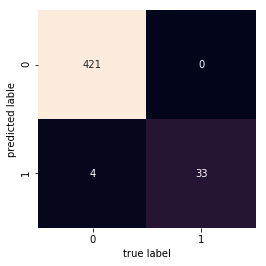

In [38]:
mat = confusion_matrix(y_test,w_preds)
sns.heatmap(mat.T,square = True,annot=True,fmt='o',cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted lable')

In [46]:
print('Accuracy_score: %.2f%%' %(accuracy_score(y_test,w_preds)*100.0))

Accuracy_score: 98.68%


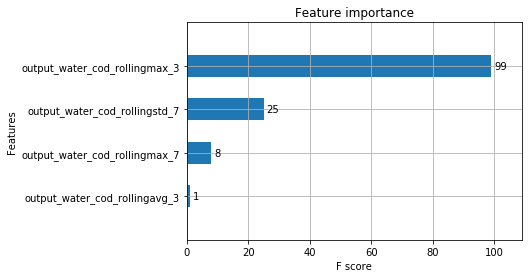

In [40]:
plot_importance(model,height=0.5)

###  窗口+缺失值处理+标准化处理+XGBClassifier

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer 

In [42]:
pipe = Pipeline([('imputer',Imputer()),('sc',StandardScaler()),('xgbc',XGBClassifier(n_estimators=100,max_depth=3,objective='multi:softmax',num_class=2,subsample=0.8,colasmple_btree=0.8))])

In [43]:
pipe.fit(X_train,y_train)
predictions = pipe.predict(X_test)
pipe.score(X_test,y_test)

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9868421052631579

Text(91.68,0.5,'predicted lable')

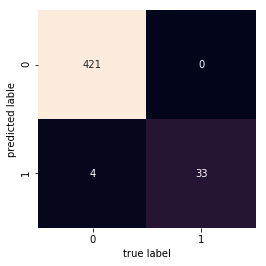

In [44]:
mat = confusion_matrix(y_test,predictions)
sns.heatmap(mat.T,square = True,annot=True,fmt='o',cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted lable')

In [45]:
print('Accuracy_score: %.2f%%' %(accuracy_score(y_test,predictions)*100.0))

Accuracy_score: 98.68%
